In [1]:
import numpy as np
import sys 
import seaborn as sns
import scipy

In [133]:
class VariableAleatoria():
    
    def __init__(self,seed=123,values=np.array([]), distribution='', params= [],method=''):
        self.seed= seed
        self.values= values
        self.distribution=distribution
        self.method= method
        self.params=params
        self.C= 0
        self.g= {"normal": 1,
                 "beta": 1,
                 "gamma": 2,
                 "argus": 1,
                 "wald": 1}
        self.aceptacion={
                   "normal": lambda x: scipy.stats.norm.pdf(x, loc= self.params[0], scale=self.params[1])/np.exp(-x),
                   "beta": lambda x: scipy.stats.beta.pdf(x,a=self.params[0],b=self.params[1])/ np.exp(-x),
                   "gamma": lambda x: scipy.stats.gamma.pdf(x,a=self.params[0])/ 2*np.exp(-2*x),
                    "argus":lambda x: scipy.stats.argus.pdf(x,chi=self.params[0])/ np.exp(-x),
                    "wald": lambda x: scipy.stats.wald.pdf(x)/ np.exp(-x)}
        self.inversa= {"exponencial": '-np.log(u)/self.params[0]',
                       "anglit": 'np.arcsin(2*u-1)/2',
                       "logistic": ('np.log((1/(.5-ui))-1)','-np.log(-(1/(.5-ui))-1)'),
                       "bradford": '((1+self.params[0])**u)/self.params[0] -1',
                       "pareto": "(1-u)**(1/(-1*self.params[0]))"
                      }
        self.isSimetric= {"exponencial": 0,"anglit": 0,"logistic":1,"bradford": 0,'pareto':0,
                          'normal': 1, 'beta': 0, "gamma": 0, "argus": 0, "wald":0}
        
    def generateInv(self,n):
        u= np.random.uniform(size=n)
        if(self.isSimetric[self.distribution]):
            ls=[]
            for ui in u:
                if(ui<.5):
                    x= (eval(self.inversa[self.distribution][0])) 
                else:
                    x= (eval(self.inversa[self.distribution][1]))
                ls.append(x)
            self.values= np.array(ls)
            
        else:
            x= (eval(self.inversa[self.distribution]))
            self.values= x
        sns.displot(self.values)
        return self.values
    def getC(self):
        ini=0
        if(self.distribution== 'wald'):
            ini=1
        max_x = scipy.optimize.fmin(lambda x: -1*self.aceptacion[self.distribution](x), ini)
        return self.aceptacion[self.distribution](max_x)[0]
    
    def generateAcep(self,n):
        ls=[]
        self.C= self.getC()
        
        while(len(ls)<n):
            u= np.random.uniform(size=1)
            y= np.random.exponential(scale=self.g[self.distribution])
            h = self.aceptacion[self.distribution](y)*(1/self.C)
            if(u<=h):
                if(self.isSimetric[self.distribution]==1):
                    u2=  np.random.uniform(size=1)
                    if(u2<=.5):
                        ls.append(y)
                    else:
                        ls.append(-y)
                else:
                    ls.append(y)
        self.values= np.array(ls)
        sns.displot(self.values)
        return self.values
            
        

In [134]:
X=VariableAleatoria(distribution='wald',params=[3])

In [135]:
X.getC()

Optimization terminated successfully.
         Current function value: -1.501798
         Iterations: 15
         Function evaluations: 30


1.5017978381807868

Optimization terminated successfully.
         Current function value: -1.501798
         Iterations: 15
         Function evaluations: 30


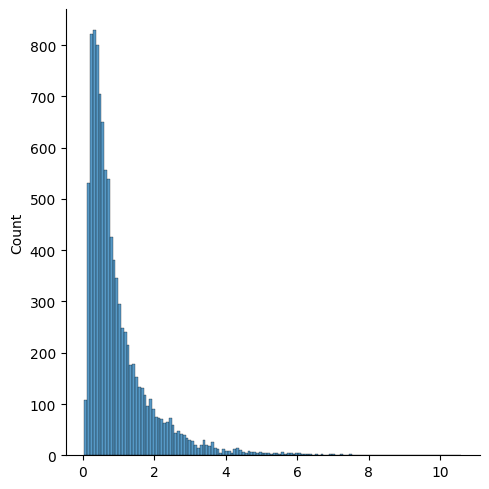

In [136]:
a= X.generateAcep(10000)

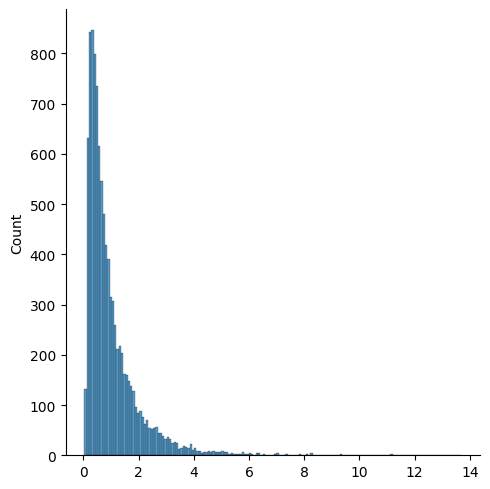

In [137]:
sns.displot(scipy.stats.wald.rvs( size= 10000))

In [41]:
X.getC()

Optimization terminated successfully.
         Current function value: -1.315489
         Iterations: 25
         Function evaluations: 50


1.3154892469589141

In [77]:
y= scipy.stats.expon.rvs(1,size=1)

In [78]:
a= X.aceptacion[X.distribution](y)*(1/X.C)

In [79]:
y

array([2.56698657])

In [80]:
a

array([3.04491127])

In [83]:
a*(1/X.C)

array([0.85151609])

In [85]:
X.aceptacion[X.distribution](y)*(1/X.C)

array([0.85151609])

In [4]:
X.aceptacion['exponencial'](2)

0.0016773131395125592

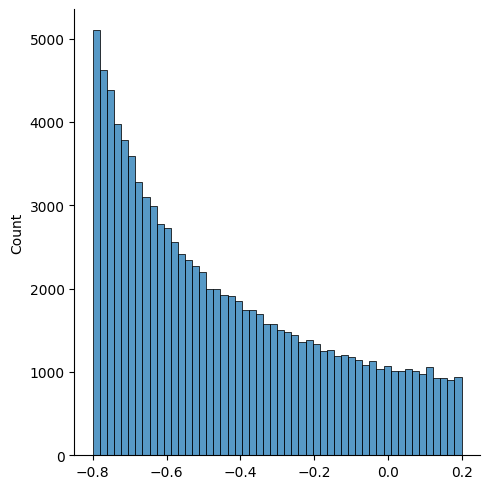

In [21]:
x=X.generateInv(100000)

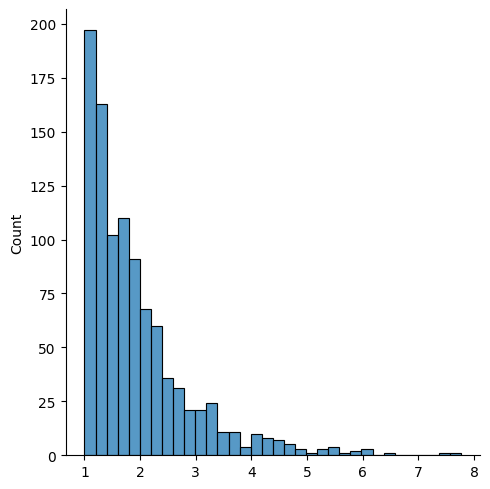

In [99]:
sns.displot(scipy.stats.expon.rvs(1,size=1000))

In [9]:
max_x

array([1.])

In [12]:
X.aceptacion['normal'](max_x)[0]

0.657744623479457

In [59]:
def f(x): return (x-1)**2
max_x = scipy.optimize.fmin(lambda x: -f(x), 1)
# array([ 1.])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 20


In [112]:
np.random.exponential(scale=1)

2.0747313054587013

/tmp/ipykernel_8356/3777721166.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Z)


<Axes: ylabel='Density'>

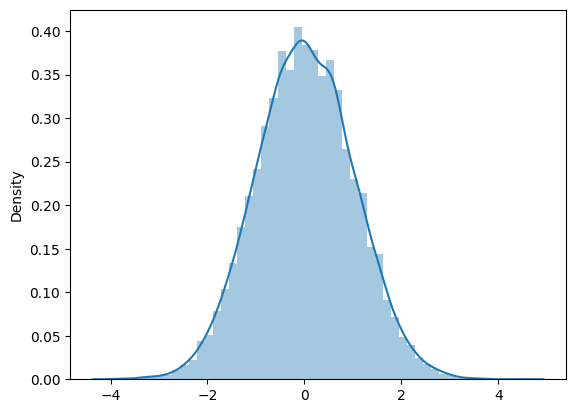

In [2]:
n = 10**4
def generador_normal():
    while True:
        Y1 = np.random.exponential(scale=1)
        Y2 = np.random.exponential(scale=1)
        if (Y2-(Y1-1)**2/2)>0:
            #Y = Y2-(Y1-1)**2/2
            U = np.random.uniform()
            if U<=1/2:
                return Y1
            else:
                return -Y1
            break
Z = np.array(list(map(lambda x:generador_normal(),range(n))))
sns.distplot(Z)